In [15]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from tensorflow.keras.preprocessing import image


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

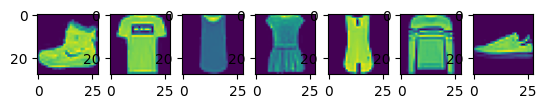

In [22]:
for i in range(7):
    plt.subplot(4,7,i+1)
    plt.imshow(x_train[i])
plt.show()

In [5]:
input_shape = (28, 28, 1)

In [6]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      # Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      # MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [7]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [9]:
%%time

history = model_1.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 63s 33ms/step - loss: 0.4116 - accuracy: 0.8536 - val_loss: 0.3285 - val_accuracy: 0.8840
Epoch 2/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2768 - accuracy: 0.9002 - val_loss: 0.2874 - val_accuracy: 0.8923
Epoch 3/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2362 - accuracy: 0.9139 - val_loss: 0.2688 - val_accuracy: 0.9065
Epoch 4/5
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2095 - accuracy: 0.9233 - val_loss: 0.2535 - val_accuracy: 0.9071
Epoch 5/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1855 - accuracy: 0.9321 - val_loss: 0.2747 - val_accuracy: 0.9019
CPU times: total: 10min 32s
Wall time: 5min 24s


In [24]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(64, activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [25]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [26]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5142 - accuracy: 0.8217 - val_loss: 0.4556 - val_accuracy: 0.8336
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3899 - accuracy: 0.8607 - val_loss: 0.4268 - val_accuracy: 0.8445
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3515 - accuracy: 0.8720 - val_loss: 0.3888 - val_accuracy: 0.8589
Epoch 4/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3258 - accuracy: 0.8819 - val_loss: 0.3620 - val_accuracy: 0.8722
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3082 - accuracy: 0.8868 - val_loss: 0.3661 - val_accuracy: 0.8684
CPU times: total: 53 s
Wall time: 43.7 s


4 эпоха получает максимальную точность увелечения входных нейронов на точность не влияет

In [27]:
model_3 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'sigmoid'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

Sigmoid Это функция активации, которая ограничивает выходной сигнал нейрона диапазоном от 0 до 1. Рекомендуется использовать сигмоид для задач двоичной классификации.
Softmax Это функция активации, используемая на выходном уровне сети для преобразования значений в распределение вероятностей. Значения распределения вероятностей варьируются от 0 до 1. Сумма всех значений равна 1. Softmax используется в задачах многоклассовой классификации.
ReLu Это обычно используемая функция активации, которая принимает тензор, и если значение в тензоре отрицательное, она изменяет его на ноль. Положительное значение остается неизменным. Пороговое значение также может быть изменено с нуля.
Tanh похожа на сигмовидную функцию активации, за исключением того, что диапазон, в который она отображает значения, находится между -1 и 1. Мы используем функцию активации tanh, где отрицательные значения важны для модели. В основном он используется в скрытом слое нейронной сети.
Функция активации ReLU страдает от проблемы отмирания ReLU.
Протекающий ReLU считается вариантом функции ReLU и решением проблемы отмирания ReLU, с которой сталкивается функция активации ReLU. синтаксис

In [28]:
model_3.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [29]:
%%time

history = model_3.fit(x_train, y_train_cat, batch_size=32, epochs=4,validation_data =(x_test, y_test_cat) )

Epoch 1/4
1875/1875 [==============================] - 118s 61ms/step - loss: 0.4960 - accuracy: 0.8291 - val_loss: 0.3575 - val_accuracy: 0.8724
Epoch 2/4
1875/1875 [==============================] - 98s 52ms/step - loss: 0.3012 - accuracy: 0.8923 - val_loss: 0.2926 - val_accuracy: 0.8926
Epoch 3/4
1875/1875 [==============================] - 102s 54ms/step - loss: 0.2489 - accuracy: 0.9098 - val_loss: 0.2748 - val_accuracy: 0.8964
Epoch 4/4
1875/1875 [==============================] - 99s 53ms/step - loss: 0.2165 - accuracy: 0.9220 - val_loss: 0.2576 - val_accuracy: 0.9063
CPU times: total: 15min 6s
Wall time: 6min 57s


In [73]:
model_4 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(128, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(256, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(256,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [76]:
model_4.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

В Keras существует несколько оптимизаторов алгоритма градиентного спуска. Вот некоторые из них:

SGD — стохастический градиентный алгоритм (с моментами, в том числе и по Нестерову).

RMSProp и Adadelta — подобны Adagrad, но пытаются бороться с чрезмерным накоплением квадратов градиентов.

Adam — смесь алгоритма с моментом и квадратов градиентов.

Adagrad — оптимизация на основе квадратов градиентов.

Adamax — вариант оптимизации по Adam, но без ограничений по норме.

Nadam — комбинация алгоритма Adam с нестеровским моментом.

Ftrl — оптимизатор, реализующий FTRL-алгоритм.

In [78]:
%%time

history = model_4.fit(x_train, y_train_cat, batch_size=10, epochs=8,validation_data =(x_test, y_test_cat) )


Epoch 1/8
6000/6000 [==============================] - 321s 53ms/step - loss: 0.1807 - accuracy: 0.9339 - val_loss: 0.3110 - val_accuracy: 0.8964
Epoch 2/8
6000/6000 [==============================] - 327s 55ms/step - loss: 0.1655 - accuracy: 0.9385 - val_loss: 0.2765 - val_accuracy: 0.9150
Epoch 3/8
6000/6000 [==============================] - 319s 53ms/step - loss: 0.1507 - accuracy: 0.9440 - val_loss: 0.2885 - val_accuracy: 0.9136
Epoch 4/8
6000/6000 [==============================] - 325s 54ms/step - loss: 0.1431 - accuracy: 0.9469 - val_loss: 0.2643 - val_accuracy: 0.9161
Epoch 5/8
6000/6000 [==============================] - 326s 54ms/step - loss: 0.1367 - accuracy: 0.9500 - val_loss: 0.2923 - val_accuracy: 0.9141
Epoch 6/8
6000/6000 [==============================] - 348s 58ms/step - loss: 0.1262 - accuracy: 0.9532 - val_loss: 0.3436 - val_accuracy: 0.9079
Epoch 7/8
6000/6000 [==============================] - 384s 64ms/step - loss: 0.1215 - accuracy: 0.9554 - val_loss: 0.4585 -

Изменения параметров модели будь то изменение оптимизатора, функций активаций, добавления слоя, количество эпох или уменьшение увелечинения размеров шагов градиента banch. дает не значительные расхождения с моделью написанной на семинаре. макимальное дастигнутое мной значение было 0.92 против 0.9137 на семинаре, что не имеет статистически значимого веса. На всех настройках максимальная точность зафиксированна на 4-ой эпохе

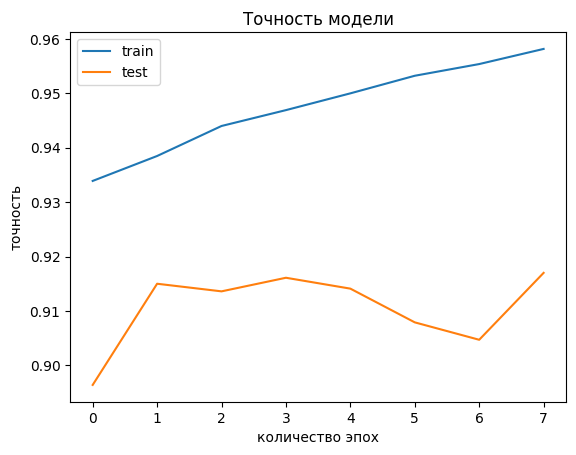

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

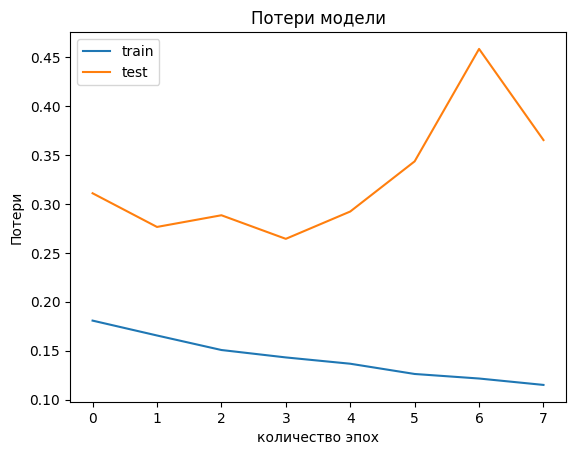

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [81]:
model_4.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 3, 3, 128)      

In [82]:
keras.utils.plot_model(model_4)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
